In [1]:
import numpy as np
import torch
from torchvision import datasets, transforms
import helper
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F
from collections import OrderedDict

In [2]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes. '''
    ps = ps.data.numpy().squeeze()
    
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.set_title('Image')
    ax1.axis('off')
    
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    
    plt.tight_layout()

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5),(0.5))])

In [4]:
trainset = datasets.MNIST('MNIST_data/',download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/',download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [5]:
input_size = 784
hidden_size = [128, 64]
output_size = 10

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(hidden_size[1], output_size)),
    ('softmax', nn.Softmax(dim=1))
]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.3)

epochs = 50
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flattern MNIST images into a 784 long vector
        #images = images.view(images.shape[0], -1)
        images = images.resize_(images.shape[0], 784)
        # TODO: Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f'Training loss: {running_loss/len(trainloader)}')

Training loss: 1.5453861745944155
Training loss: 1.5238120840556586
Training loss: 1.5154813488663386
Training loss: 1.5104286511823821
Training loss: 1.5058000138573555
Training loss: 1.5027318614632337
Training loss: 1.5001719591459994
Training loss: 1.4983469242734442
Training loss: 1.4957800543130333
Training loss: 1.4942536016008747
Training loss: 1.4925550608746787
Training loss: 1.4920288624285636
Training loss: 1.4890695834464864
Training loss: 1.4897536114334806
Training loss: 1.4875029345819437
Training loss: 1.4880339055935712
Training loss: 1.4870353450398963
Training loss: 1.4858812851183958
Training loss: 1.4852515282407244
Training loss: 1.4848588145872168
Training loss: 1.4848253866756902
Training loss: 1.4854051183535855
Training loss: 1.4835228580655828
Training loss: 1.48304762692848
Training loss: 1.4822448785625286
Training loss: 1.4824662167888714
Training loss: 1.4824222656709554
Training loss: 1.4801471514234157
Training loss: 1.4816782319469493
Training loss: 1

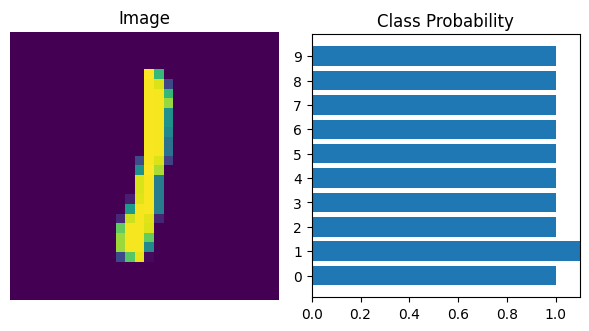

In [13]:
images, labels = next(iter(trainloader))

img = images[0].view(1,784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are Log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1,28,28), ps)